# EDA

In this notebook, do some analysis regarding trends in the data

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns
import math


pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/1500_sentiment_api.csv')
df.head()

id  latitude  longitude  price shared_status  accommodates  \
0      177  39.69551 -104.92489   79.0   entire home             2   
1      360  39.76758 -105.00316  133.0   entire home             3   
2  2361919  39.77960 -105.03859   76.0   entire home             2   
3  2386289  39.76777 -105.03529  150.0   entire home             4   
4  4992412  39.76822 -105.00249   73.0  private room             2   

  accomodation_group  bathrooms  bedrooms  beds_adjusted      neighborhood  \
0                0-2        1.0       1.0            1.0  Virginia Village   
1                3-4        1.0       2.0            2.0          Highland   
2                0-2        1.0       1.0            1.0          Berkeley   
3                3-4        1.0       1.0            1.0     West Highland   
4                0-2        2.0       1.0            1.0          Highland   

   has_neighborhood_overview  has_reviews  \
0                          1            1   
1                          1            1   
2                          1            1   
3                          1            1   
4                          1            0   

                            listing_url  host_in_CO  \
0      https://www.airbnb.com/rooms/177           1   
1      https://www.airbnb.com/rooms/360           1   
2  https://www.airbnb.com/rooms/2361919           1   
3  https://www.airbnb.com/rooms/2386289           1   
4  https://www.airbnb.com/rooms/4992412           1   

   host_lives_in_neighborhood  host_id            host_name  \
0                           1      615                  Joe   
1                           1      666  Jennifer & Giovanni   
2                           1  5811115              Annette   
3                           1   184771              Melanie   
4                           1  5181201       Danno & Rachel   

   host_response_time  host_response_rate  host_acceptance_rate  \
0      within an hour                 1.0                  1.00   
1      within an hour                 1.0                  0.87   
2  within a few hours                 1.0                  0.81   
3                 NaN                 NaN                  1.00   
4                 NaN                 NaN                  0.00   

   host_is_superhost host_neighbourhood  host_listings_count  \
0                1.0   Virginia Village                  2.0   
1                1.0           Highland                  4.0   
2                1.0           Berkeley                  5.0   
3                0.0      West Highland                  1.0   
4                0.0           Highland                  3.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                   1.0                     0.0   
1                        4.0                   1.0                     1.0   
2                        6.0                   1.0                     0.0   
3                        2.0                   1.0                     1.0   
4                        4.0                   1.0                     1.0   

   has_host_about  years_hosting  years_of_reviews  license_listed  \
0               1           15.0               6.0               1   
1               1           15.0               4.0               1   
2               1           10.0               8.0               0   
3               1           13.0               8.0               1   
4               1           10.0               0.0               0   

   response_time  host_lives_in_neighborhood.1  \
0            0.0                             1   
1            0.0                             1   
2            1.0                             1   
3            4.0                             1   
4            4.0                             1   

                                                name  \
0   Tiny Home in the Heart of the City- ECO FRIENDLY   
1  Sit in the Peaceful Garden of the Chickadee

# Exploration of Price distributions

In [31]:
df['amenities'][93]

'["Cleaning products", "Hot water", "Long term stays allowed", "Coffee maker", "Shared gym", "Oven", "Children\\u2019s books and toys", "Kitchen", "Dishwasher", "Crib", "High chair", "Self check-in", "Hangers", "Keypad", "Heating", "First aid kit", "Cooking basics", "Free parking on premises", "Window AC unit", "Carbon monoxide alarm", "Body soap", "Wifi", "Ceiling fan", "Free dryer \\u2013 In unit", "Fire extinguisher", "Stove", "Luggage dropoff allowed", "Bathtub", "Conditioner", "Portable fans", "Outlet covers", "Shampoo", "Window guards", "Hair dryer", "Smoke alarm", "Pets allowed", "Private patio or balcony", "Exercise equipment", "Dishes and silverware", "Free street parking", "Private entrance", "Room-darkening shades", "Iron", "Free washer \\u2013 In unit", "Essentials", "Dedicated workspace", "Shower gel", "Microwave", "32\\" HDTV", "Refrigerator"]'

In [33]:
len(df[df['amenities'].str.contains('Hot tub')])

125

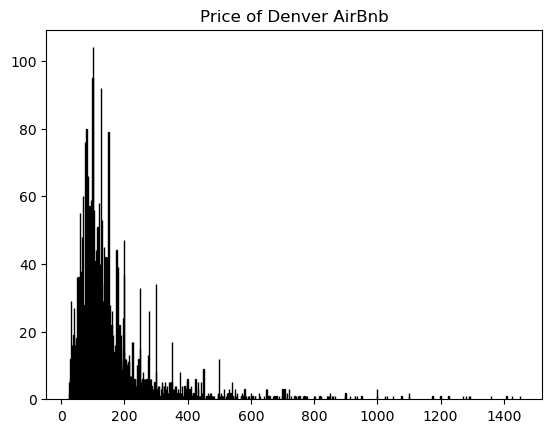

In [5]:
categories = df['price'].value_counts().head(1000).index
counts = df['price'].value_counts().head(1000).values
plt.title('Price of Denver AirBnb')
fig=plt.bar(categories, counts , edgecolor='black', color='#72b3a5')
plt.show()

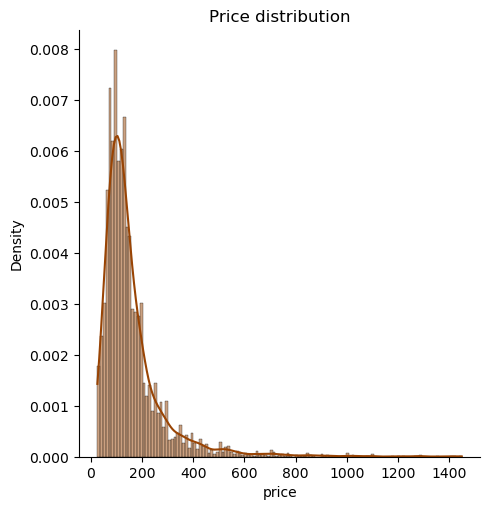

In [6]:

sns.displot(df['price'], kde=True, stat="density", color='#994404')
plt.title("Price distribution");

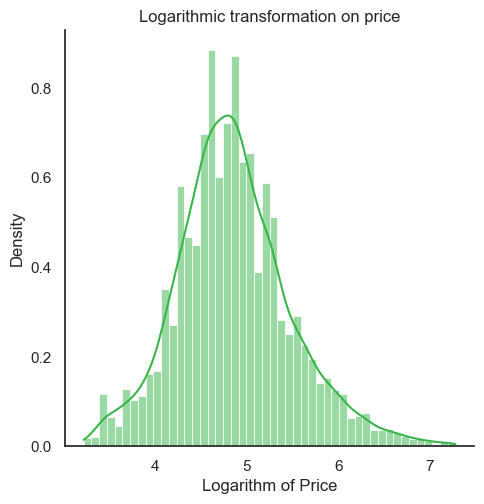

In [196]:

plot = sns.displot(np.log(df['price']), kde=True, stat="density", color='#39b54a')
plot.set_xlabels('Logarithm of Price')

plt.title("Logarithmic transformation on price");

# Exploration of size of listing

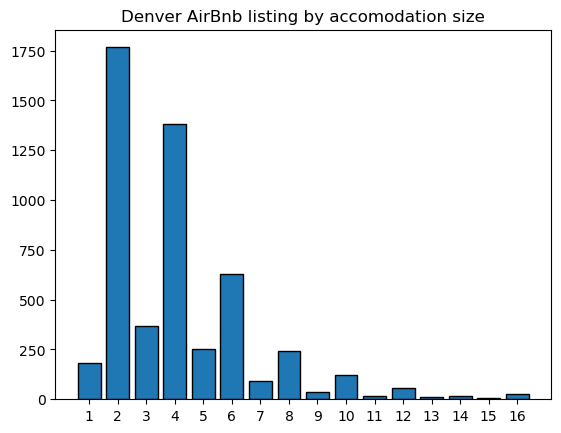

''

In [42]:
categories = df['accommodates'].value_counts().index
counts = df['accommodates'].value_counts().values
plt.title('Denver AirBnb listing by accomodation size')
fig=plt.bar(categories, counts, edgecolor='black')

plt.xticks(np.arange(1, 17, 1)) 
plt.show()
;

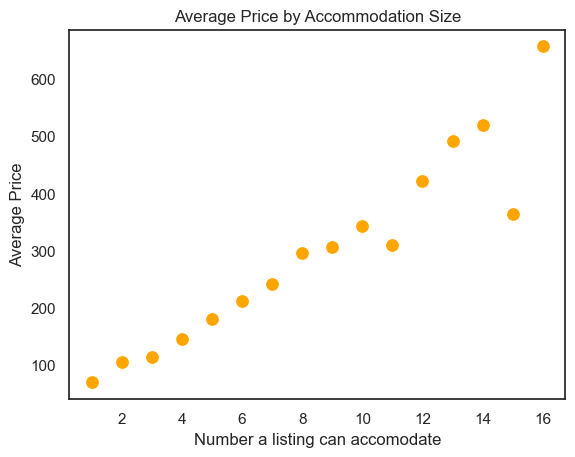

In [161]:
grouped_data = df.groupby("accommodates")["price"].mean().reset_index()


sns.scatterplot(data=grouped_data, x="accommodates", y="price", color='orange', s=100)


plt.xlabel("Number a listing can accomodate")
plt.ylabel("Average Price")
plt.title("Average Price by Accommodation Size")
plt.savefig('../images/accomodation_price.png', bbox_inches='tight')

plt.show()

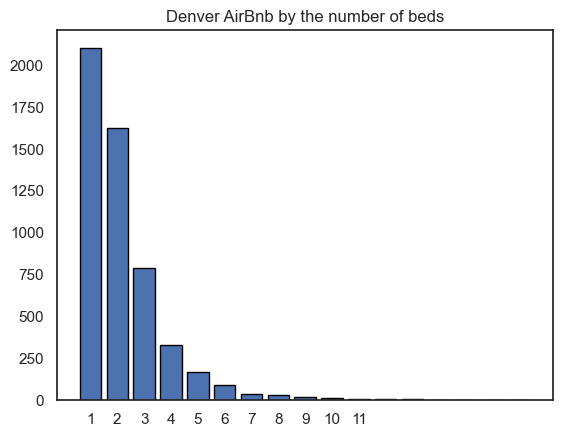

''

In [83]:
categories = df['beds_adjusted'].value_counts().index
counts = df['beds_adjusted'].value_counts().values
plt.title('Denver AirBnb by the number of beds')
fig=plt.bar(categories, counts, edgecolor='black')
plt.xticks(np.arange(1, 12, 1)) 
sns.set_style("white")
plt.show()
;

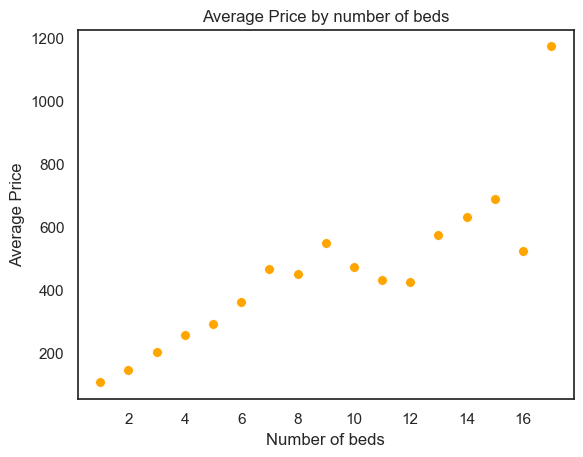

In [131]:
grouped_data = df.groupby("beds_adjusted")["price"].mean().reset_index()


sns.scatterplot(data=grouped_data, x="beds_adjusted", y="price", color='orange', s=50)


plt.xlabel("Number of beds")
plt.ylabel("Average Price")
plt.title("Average Price by number of beds")
plt.savefig('../images/beds_price.png', bbox_inches='tight')

plt.show()

''

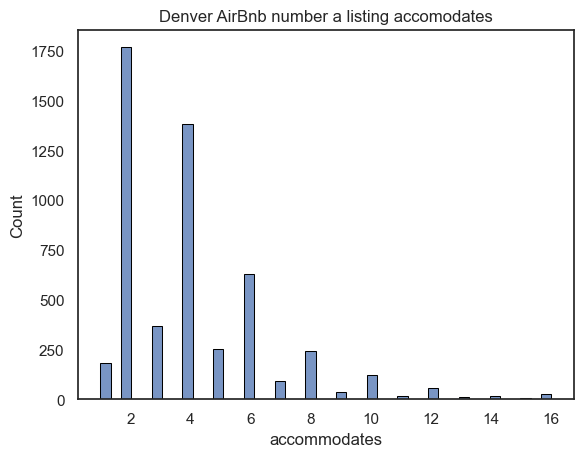

In [55]:
sns.histplot(df['accommodates'],edgecolor='black')
plt.title('Denver AirBnb number a listing accomodates')
sns.set_style("white")
;

In [56]:
bins=[0,2,4,6,8, np.inf]

names=['0-2', '3-4', '5-6','6-7','8+']

df['group_size']=pd.cut(df['accommodates'], bins, labels=names)

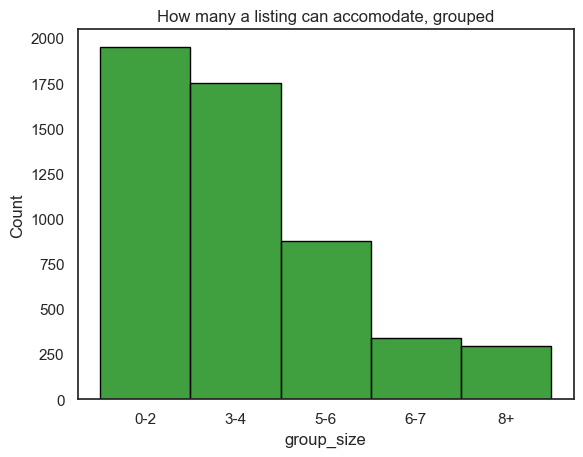

In [94]:
sns.histplot(df['group_size'], edgecolor='black', color='green')
plt.title('How many a listing can accomodate, grouped')
plt.savefig('../images/accomodate.png', bbox_inches='tight');

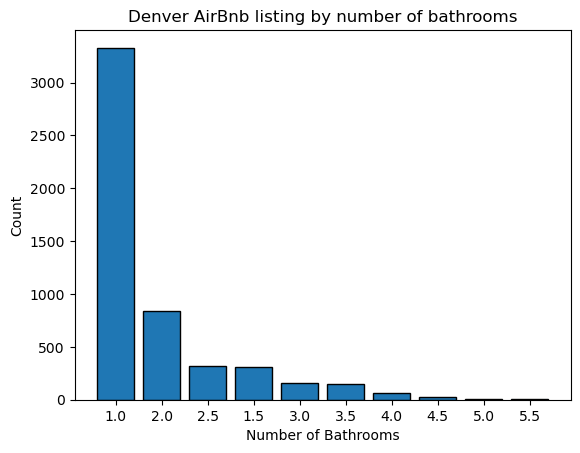

In [64]:
df2=df[df['bathrooms']<6]

categories = df2['bathrooms'].value_counts().index
counts = df2['bathrooms'].value_counts().values

# Define an offset for the x-coordinates of the bars
offset = 0.1


x = np.arange(len(categories))
fig = plt.bar(x + offset, counts, edgecolor='black')


plt.xticks(x + offset, categories)
plt.title('Denver AirBnb listing by number of bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.show()

# Heatmap and paired plots to see other correlations 

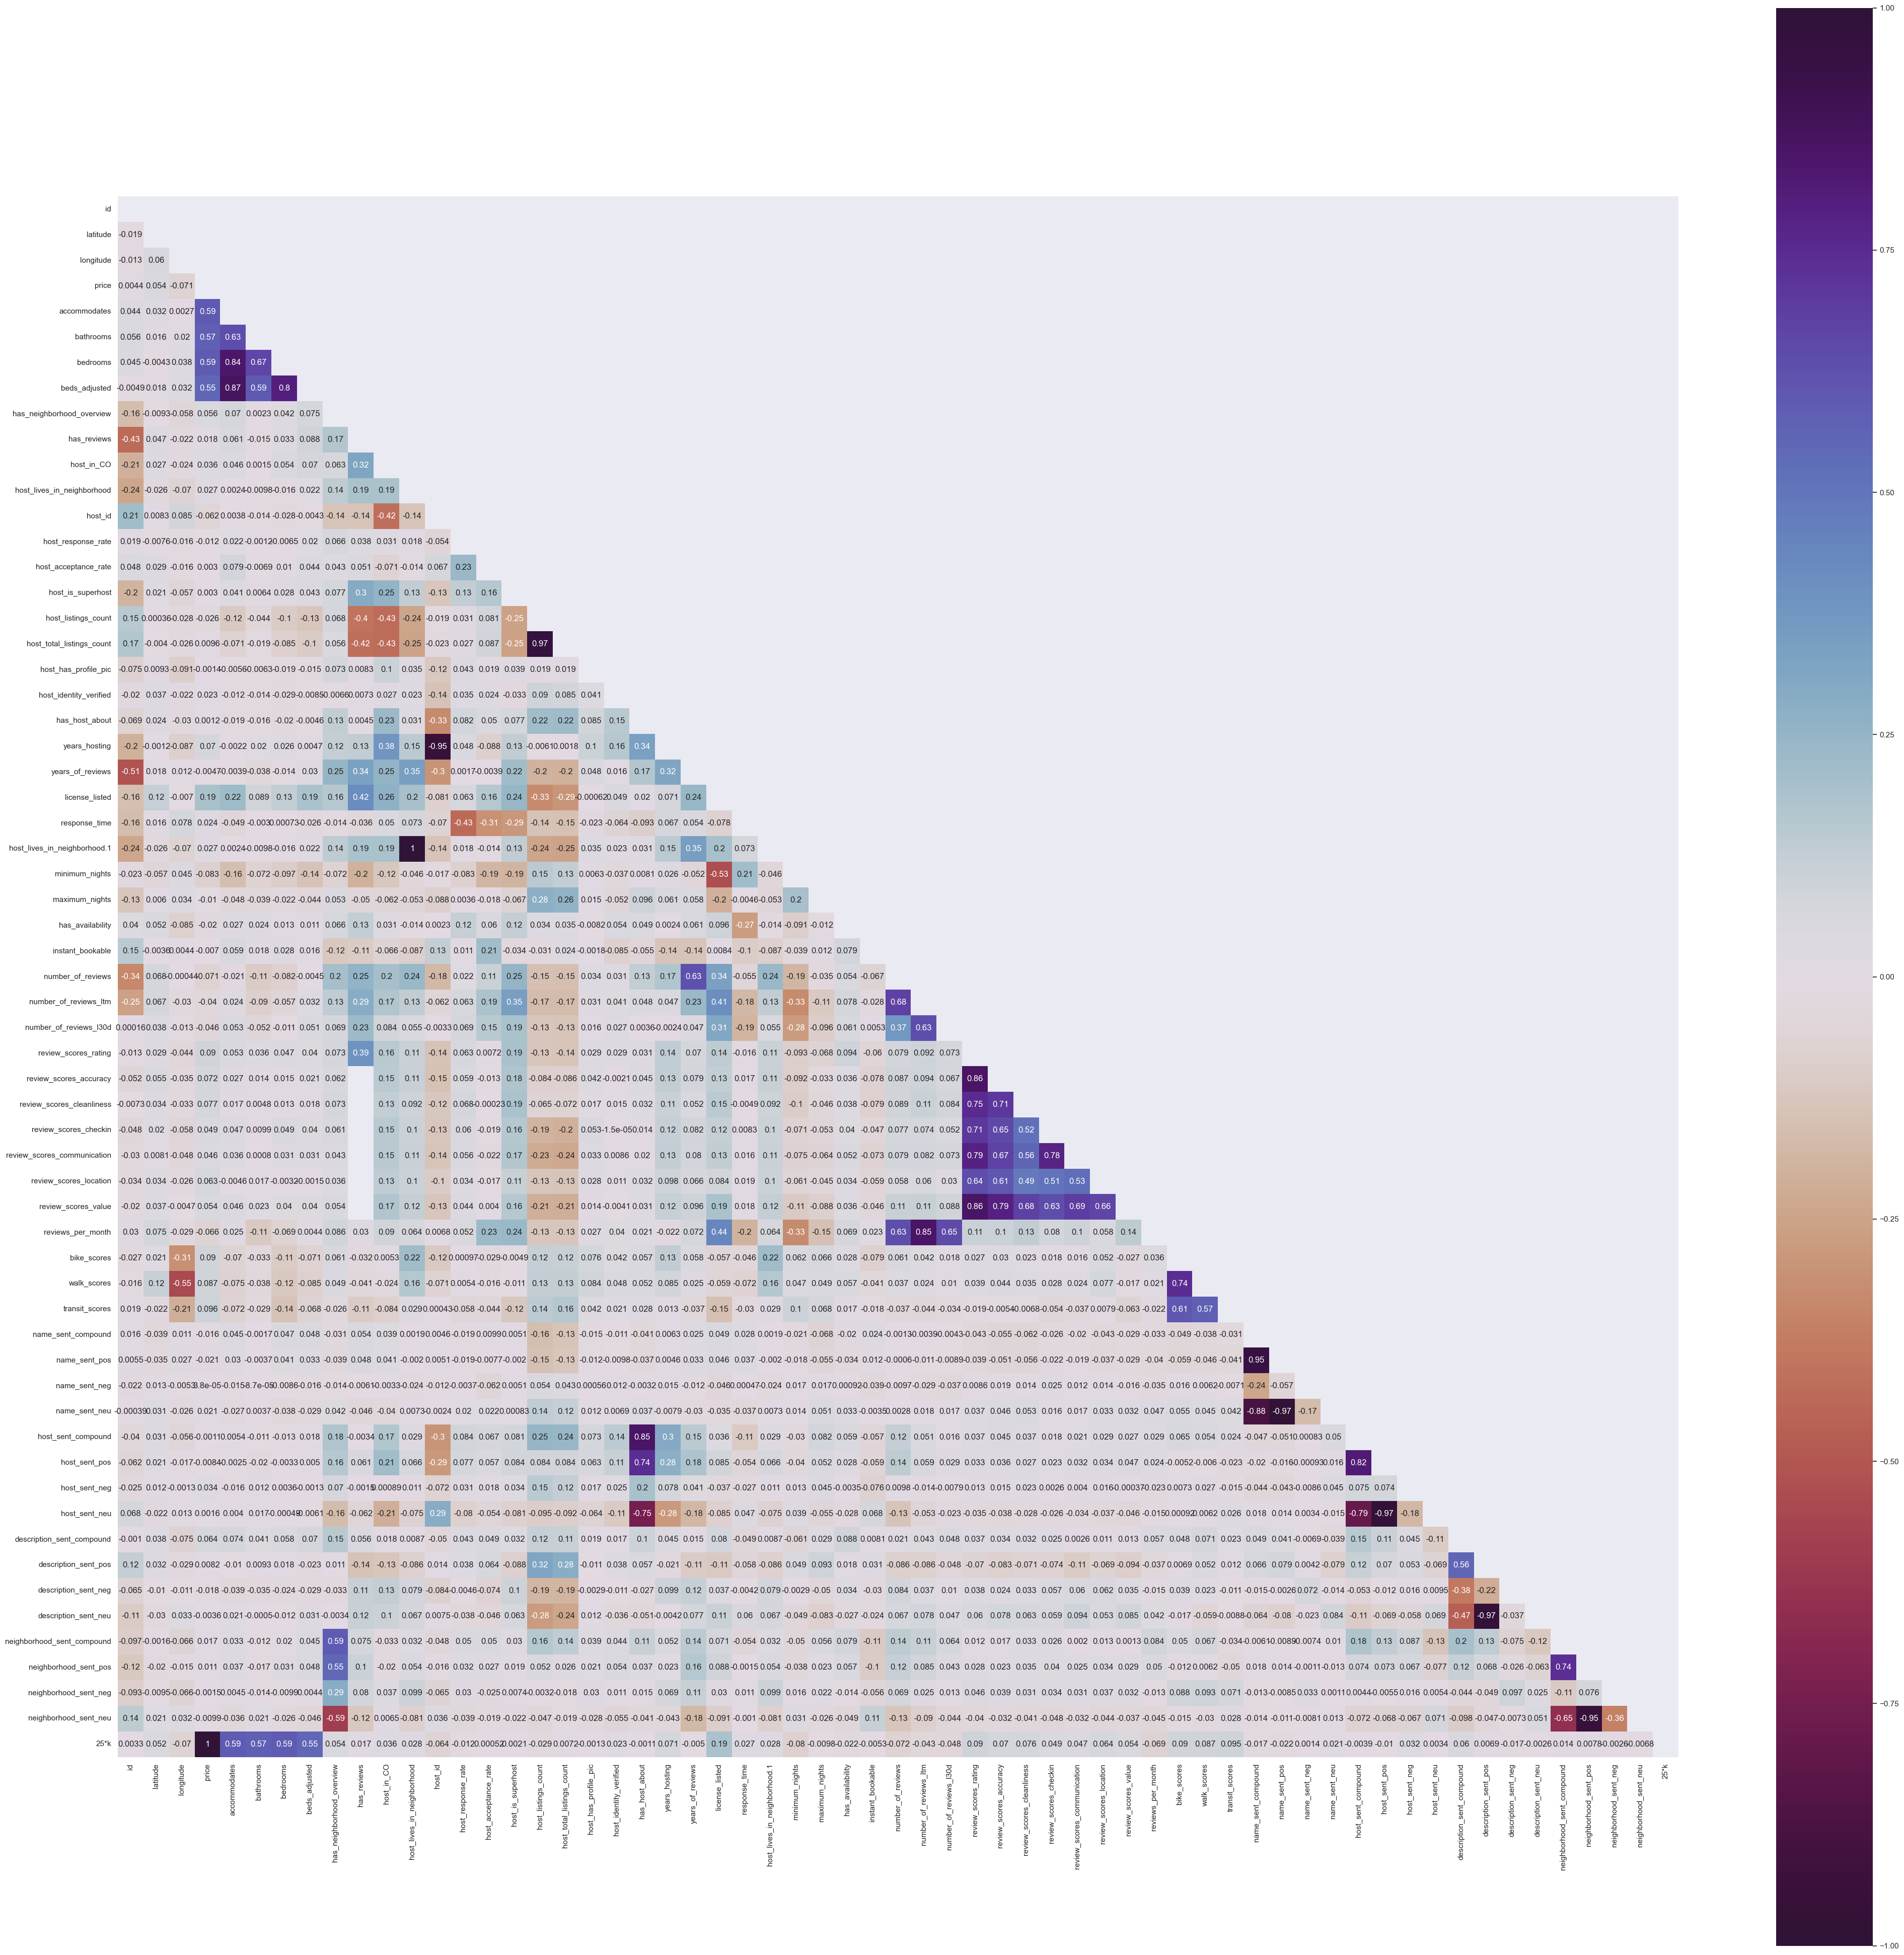

In [58]:
plt.figure(figsize = (50,50))

corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);


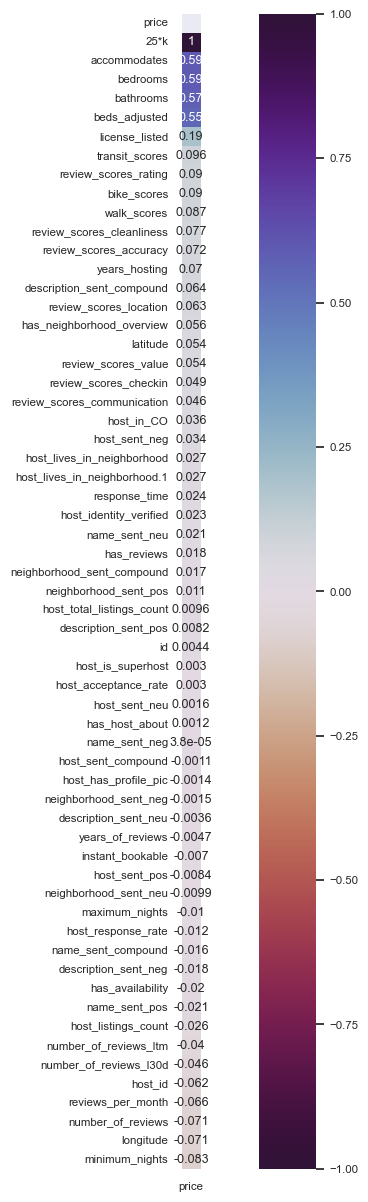

In [59]:
plt.figure(figsize = (15,15))

corr = df.corr()[['price']].sort_values("price", ascending=False)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=.75)
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);

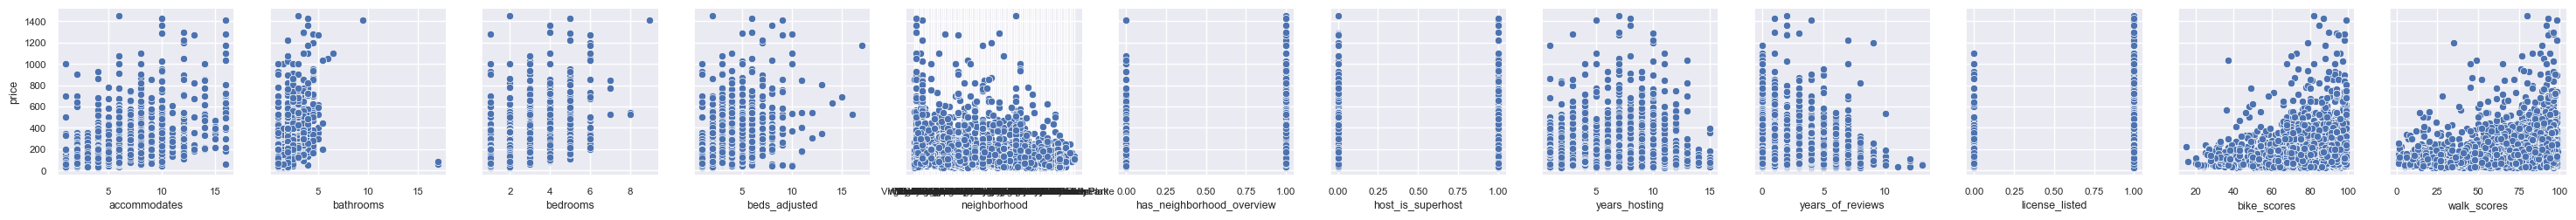

In [60]:
sns.pairplot(df, x_vars=['accommodates', 'bathrooms', 'bedrooms', 'beds_adjusted', 'neighborhood',
       'has_neighborhood_overview', 'host_is_superhost' , 'years_hosting' , 'years_of_reviews' , 'license_listed',
        'bike_scores', 'walk_scores'], y_vars=['price']);

# Explore some other features

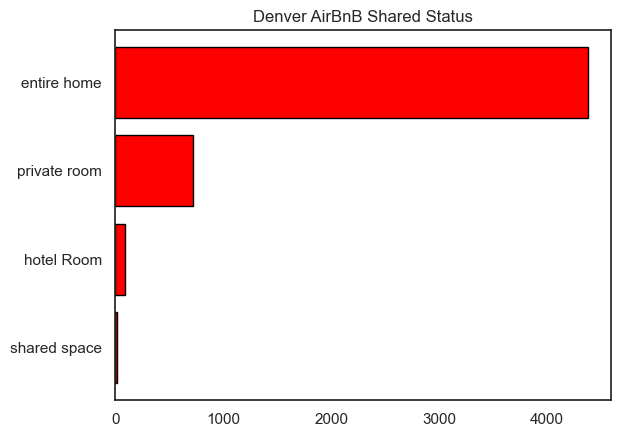

In [157]:
categories = df['shared_status'].value_counts().index
counts = df['shared_status'].value_counts().values
plt.title('Denver AirBnB Shared Status')
fig=plt.barh(categories, counts, edgecolor='black', color='red')

plt.gca().invert_yaxis()
plt.savefig('../images/shared_status.png', bbox_inches='tight')
plt.show();

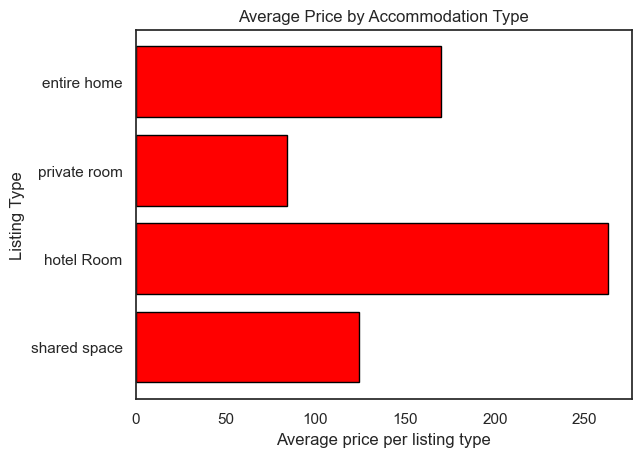

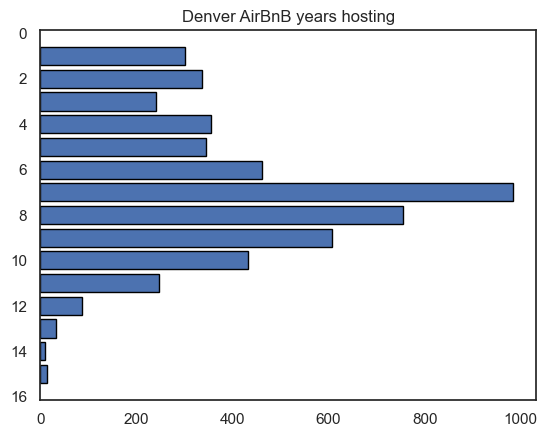

In [132]:
categories = df['years_hosting'].value_counts().index
counts = df['years_hosting'].value_counts().values
plt.title('Denver AirBnB years hosting')
fig=plt.barh(categories, counts, edgecolor='black')
plt.gca().invert_yaxis()
plt.show();

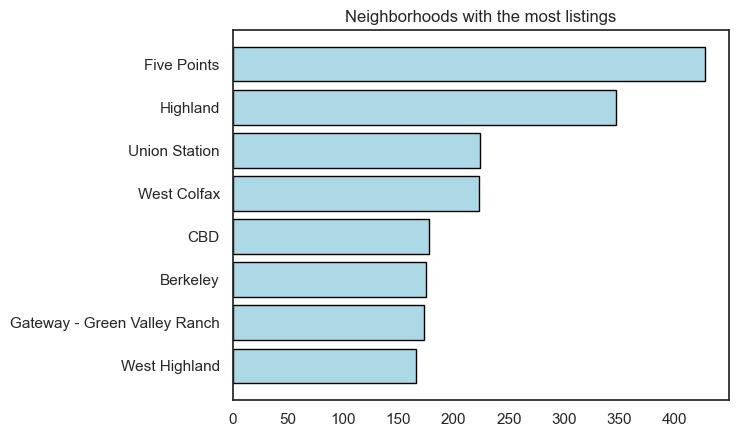

In [185]:

categories = df['neighborhood'].value_counts().head(8).index
counts = df['neighborhood'].value_counts().head(8).values
plt.title('Neighborhoods with the most listings')
fig=plt.barh(categories, counts, color='lightblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.savefig('../images/number_listings_hood.png', bbox_inches='tight')

plt.show();

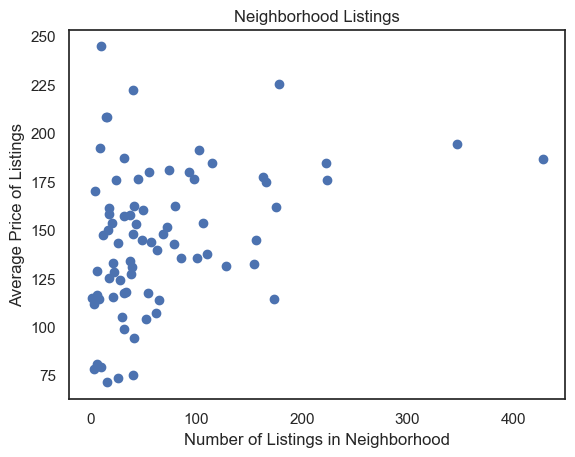

In [212]:
avg_price = df.groupby('neighborhood')['price'].mean()

count_listings = df['neighborhood'].value_counts()
neighborhood_data = pd.DataFrame({'avg_price': avg_price, 'count_listings': count_listings})


plt.scatter(neighborhood_data['count_listings'], neighborhood_data['avg_price'])
plt.xlabel('Number of Listings in Neighborhood')
plt.ylabel('Average Price of Listings')
plt.title('Neighborhood Listings')
plt.show()

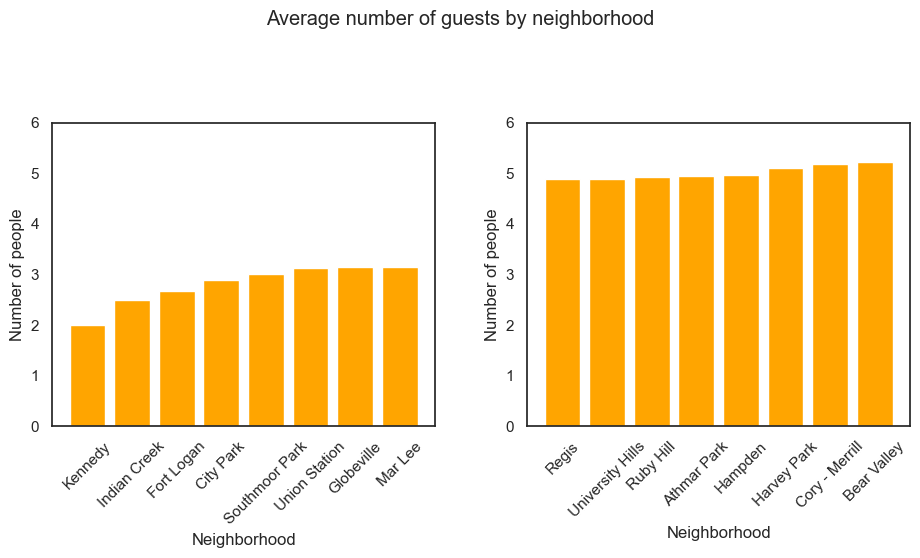

In [252]:
most_people=df.groupby('neighborhood')['accommodates'].mean().sort_values(ascending=False)

# Select the 10 priciest and 10 cheapest neighborhoods
top_10 = most_people.nlargest(8)
bottom_10 = most_people.nsmallest(8)

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Create the first subplot for the top 10 neighborhoods
axs[1].bar(top_10.index, top_10.values, color="orange")
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Number of people')
axs[1].invert_xaxis()
axs[1].set_ylim(0, 6)
axs[1].tick_params(axis='x', rotation=45)

# Create the second subplot for the bottom 10 neighborhoods
axs[0].bar(bottom_10.index, bottom_10.values, color='orange')
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('Number of people')
axs[0].set_ylim(0, 6)
axs[0].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing of the subplots
fig.suptitle("Average number of guests by neighborhood")
fig.tight_layout(pad=3.0)
plt.savefig('../images/most_guests_hood.png', bbox_inches='tight')
# Show the plot
plt.show()

#chatGPT

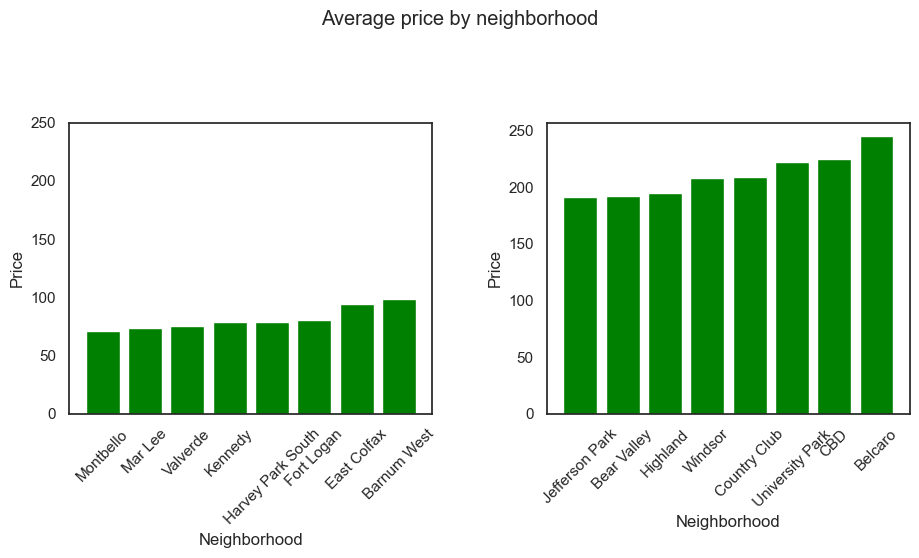

In [245]:
# Group the data by neighborhood and calculate the mean price
grouped = df.groupby('neighborhood')['price'].mean()

# Select the 10 priciest and 10 cheapest neighborhoods
top_10 = grouped.nlargest(8)
bottom_10 = grouped.nsmallest(8)

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Create the first subplot for the top 10 neighborhoods
axs[1].bar(top_10.index, top_10.values, color='green')
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Price')
axs[1].invert_xaxis()
axs[1].tick_params(axis='x', rotation=45)

# Create the second subplot for the bottom 10 neighborhoods
axs[0].bar(bottom_10.index, bottom_10.values, color='green')
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('Price')
axs[0].set_ylim(0, 250)
axs[0].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing of the subplots
fig.suptitle("Average price by neighborhood")
fig.tight_layout(pad=3.0)
plt.savefig('../images/price_hood.png', bbox_inches='tight')
# Show the plot
plt.show()


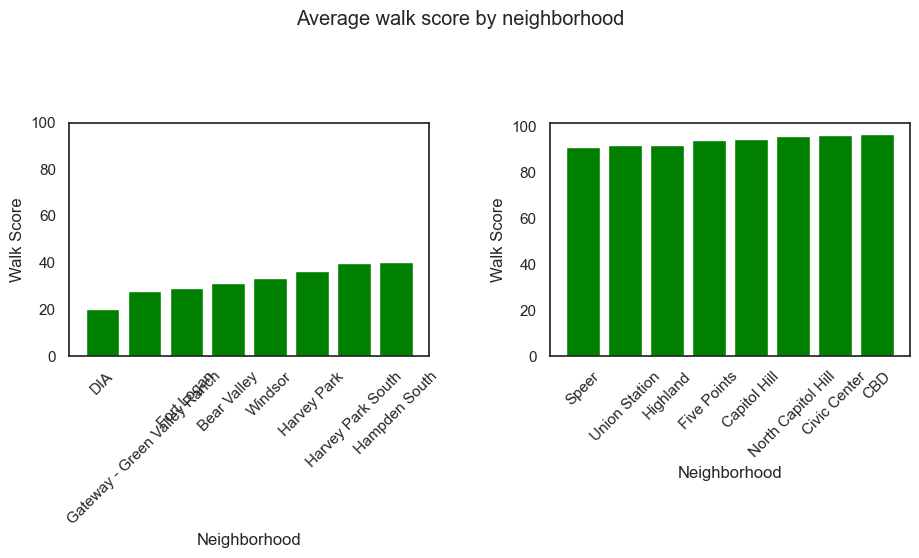

In [243]:
# Group the data by neighborhood and calculate the mean price
grouped = df.groupby('neighborhood')['walk_scores'].mean()

# Select the 10 priciest and 10 cheapest neighborhoods
top_10 = grouped.nlargest(8)
bottom_10 = grouped.nsmallest(8)

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Create the first subplot for the top 10 neighborhoods
axs[1].bar(top_10.index, top_10.values, color='green')
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Walk Score')
axs[1].invert_xaxis()
axs[1].tick_params(axis='x', rotation=45)

# Create the second subplot for the bottom 10 neighborhoods
axs[0].bar(bottom_10.index, bottom_10.values, color='green')
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('Walk Score')
axs[0].set_ylim(0, 100)
axs[0].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing of the subplots
fig.suptitle("Average walk score by neighborhood")
fig.tight_layout(pad=3.0)
plt.savefig('../images/price_hood.png', bbox_inches='tight')
# Show the plot
plt.show()


In [254]:
cost_per_person = df.groupby('neighborhood')['price', 'accommodates'].mean()
cost_per_person['cost_per_person'] = cost_per_person['price'] / cost_per_person['accommodates']


sorted_data = cost_per_person.sort_values('cost_per_person', ascending=False)


print("Most expensive neighborhoods:")
print(sorted_data.head())
print("\nCheapest neighborhoods:")
print(sorted_data.tail())

Most expensive neighborhoods:
                    price  accommodates  cost_per_person
neighborhood                                            
Belcaro        244.700000      4.300000        56.906977
Union Station  175.620536      3.133929        56.038462
CBD            225.168539      4.033708        55.821727
Country Club   208.428571      3.857143        54.037037
Cherry Creek   179.654545      3.527273        50.932990

Cheapest neighborhoods:
                        price  accommodates  cost_per_person
neighborhood                                                
Barnum West         98.612903      4.322581        22.813433
Harvey Park        115.476190      5.095238        22.663551
Ruby Hill          105.100000      4.933333        21.304054
Montbello           71.266667      3.733333        19.089286
Harvey Park South   79.000000      4.500000        17.555556


/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_27785/3603358644.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_per_person = df.groupby('neighborhood')['price', 'accommodates'].mean()


# Some scatterplots using lat-long to find any geographic correlations

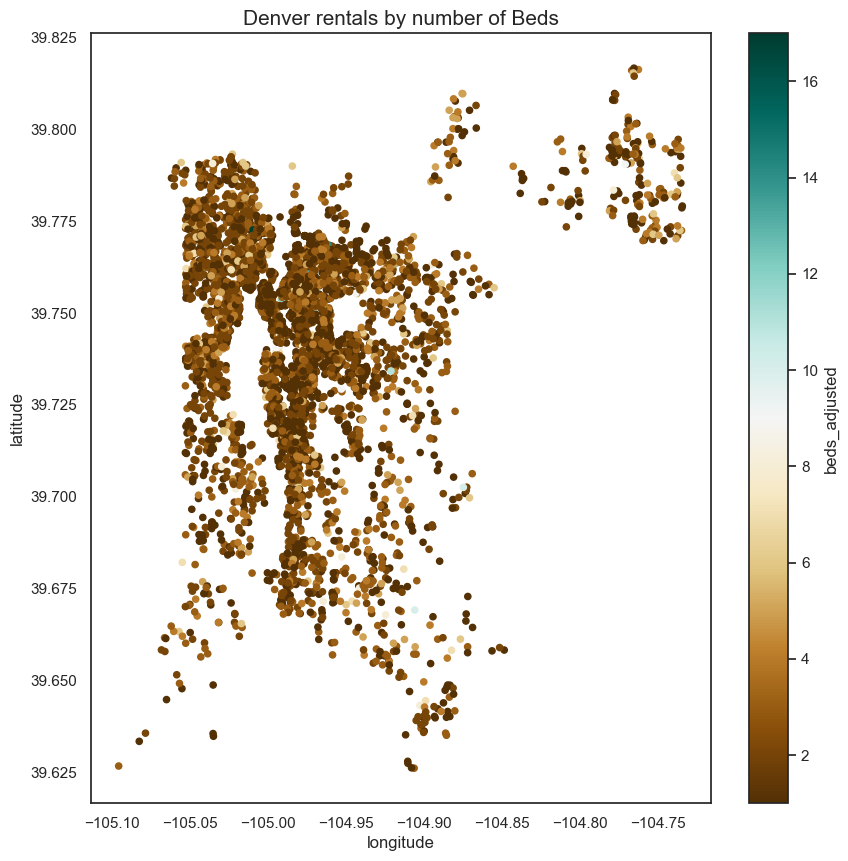

In [262]:
plt.rcParams['axes.facecolor'] = 'white'

df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='beds_adjusted',
        cmap='BrBG',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by number of Beds', fontdict={'fontsize': 15})

plt.show()


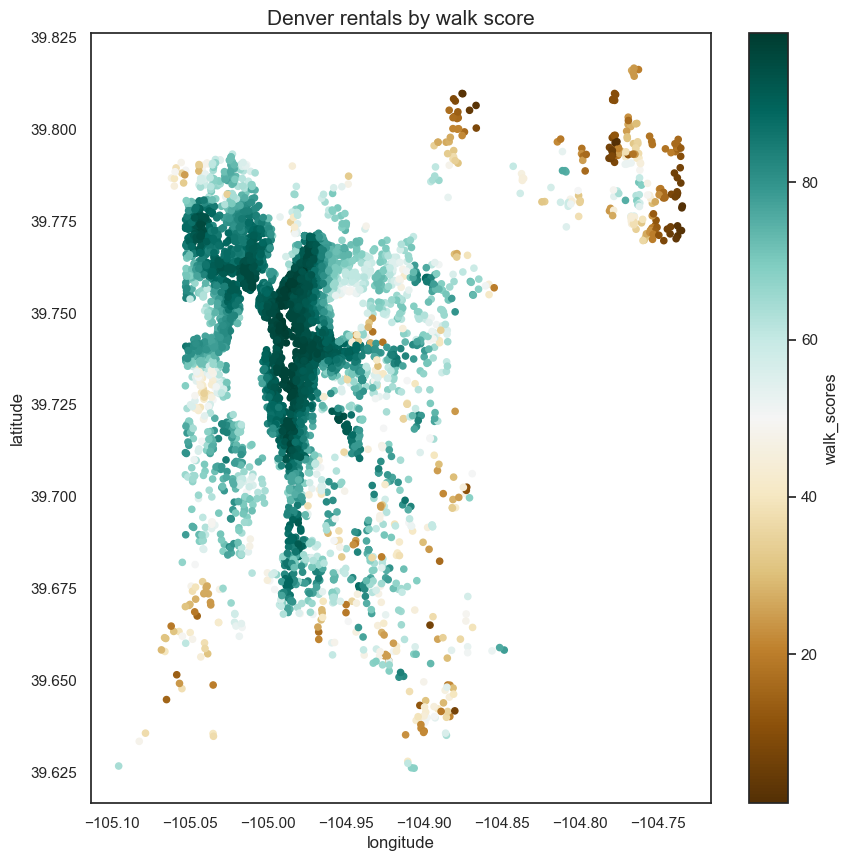

In [263]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='walk_scores',
        cmap='BrBG',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by walk score', fontdict={'fontsize': 15})
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig('../images/walk_map.png', bbox_inches='tight')
plt.show()


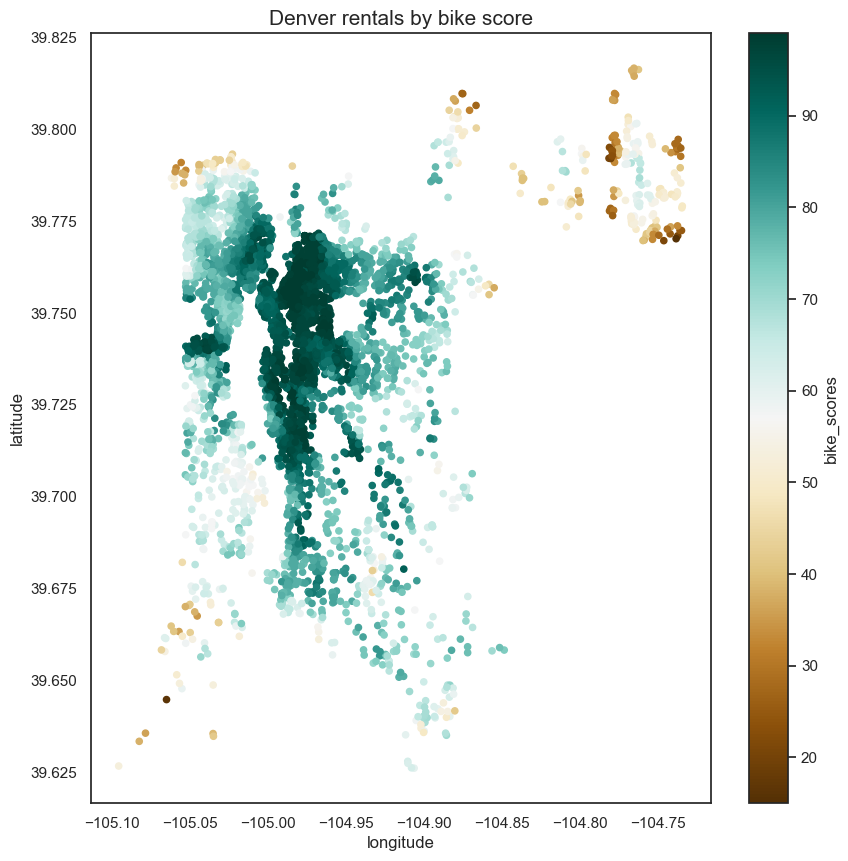

In [264]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='bike_scores',
        cmap='BrBG',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by bike score', fontdict={'fontsize': 15})
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig('../images/bike_map.png', bbox_inches='tight')
plt.show()


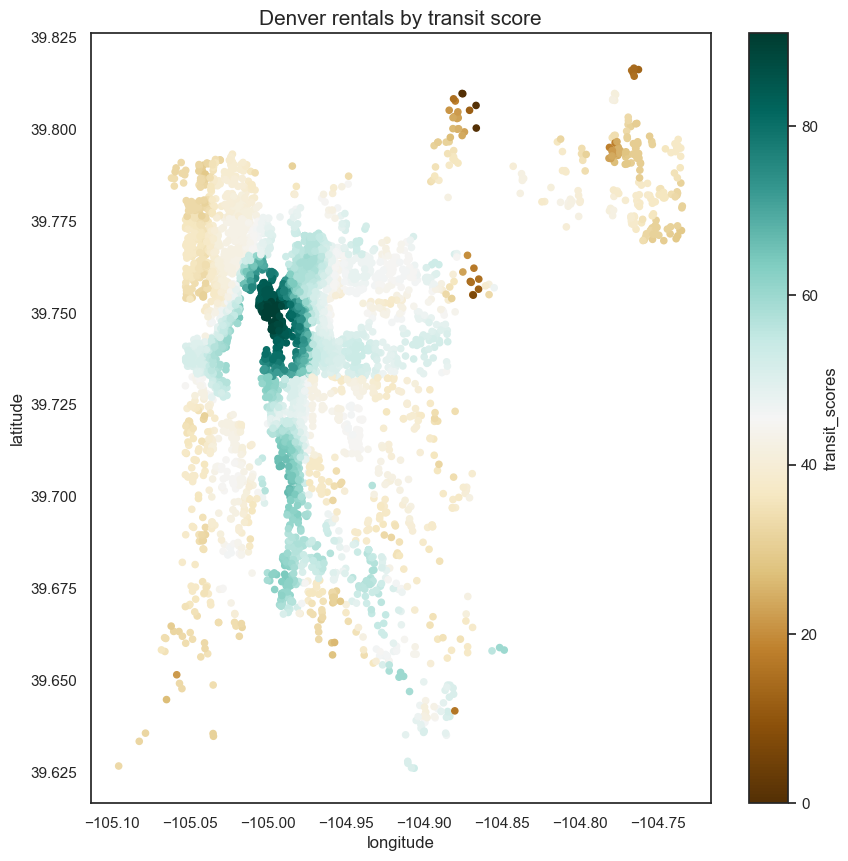

In [266]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='transit_scores',
        cmap='BrBG',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by transit score',fontdict={'fontsize': 15})
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig('../images/transit_map.png', bbox_inches='tight')
plt.show()

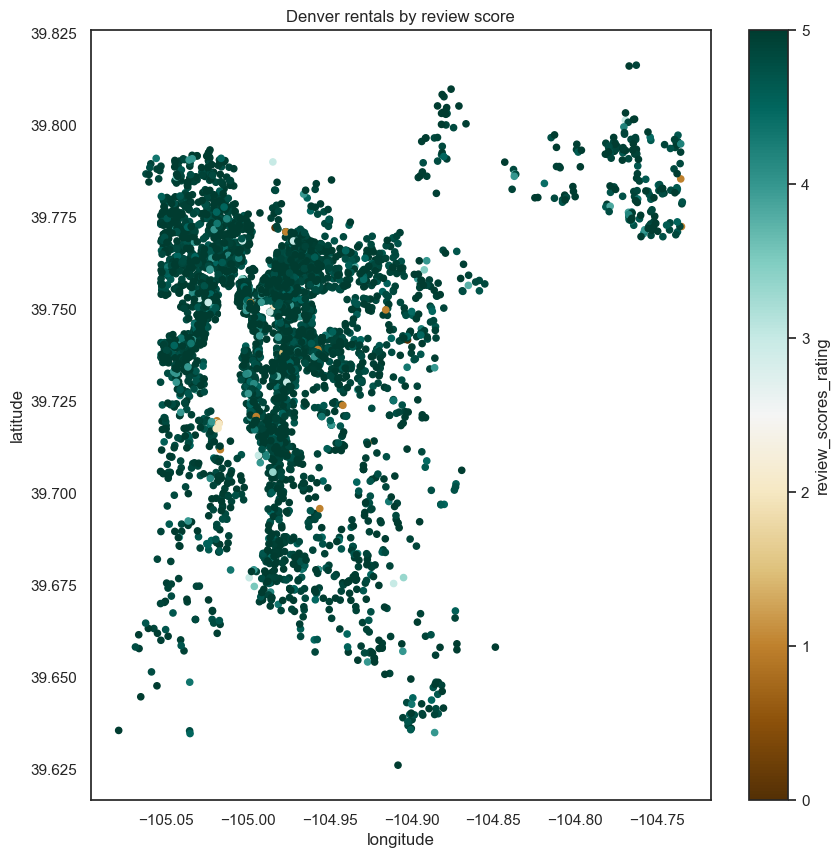

In [90]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='review_scores_rating',
        cmap='BrBG',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by review score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

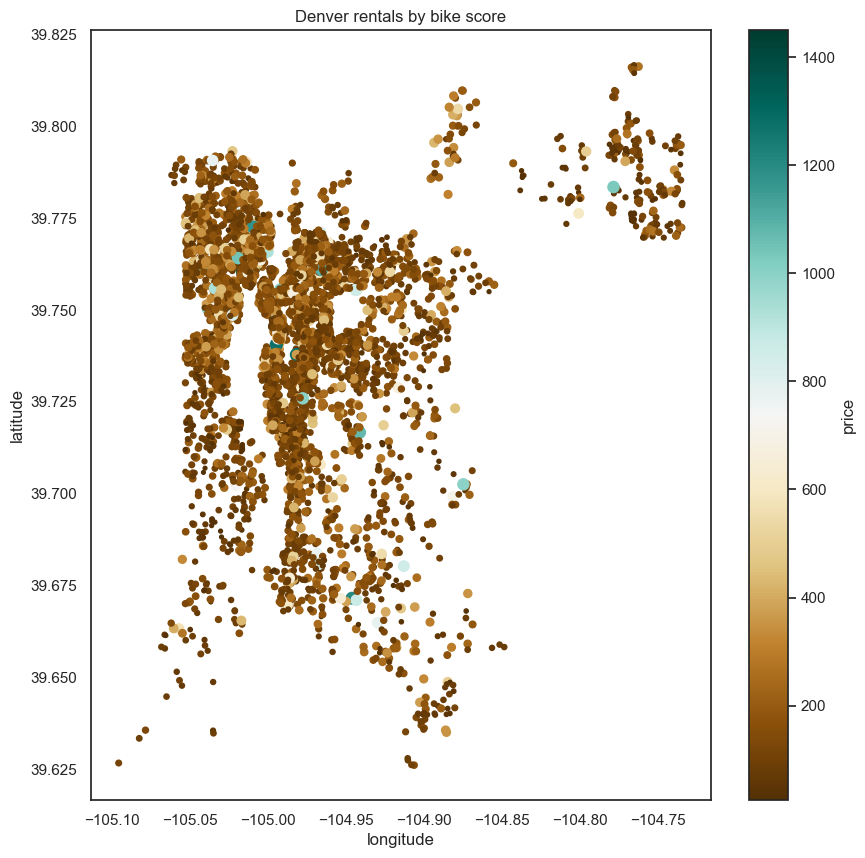

In [210]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='price',
        cmap='BrBG',
        figsize=(10,10),
        s= df['price']**0.6
        
       )
plt.title('Denver rentals by bike score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

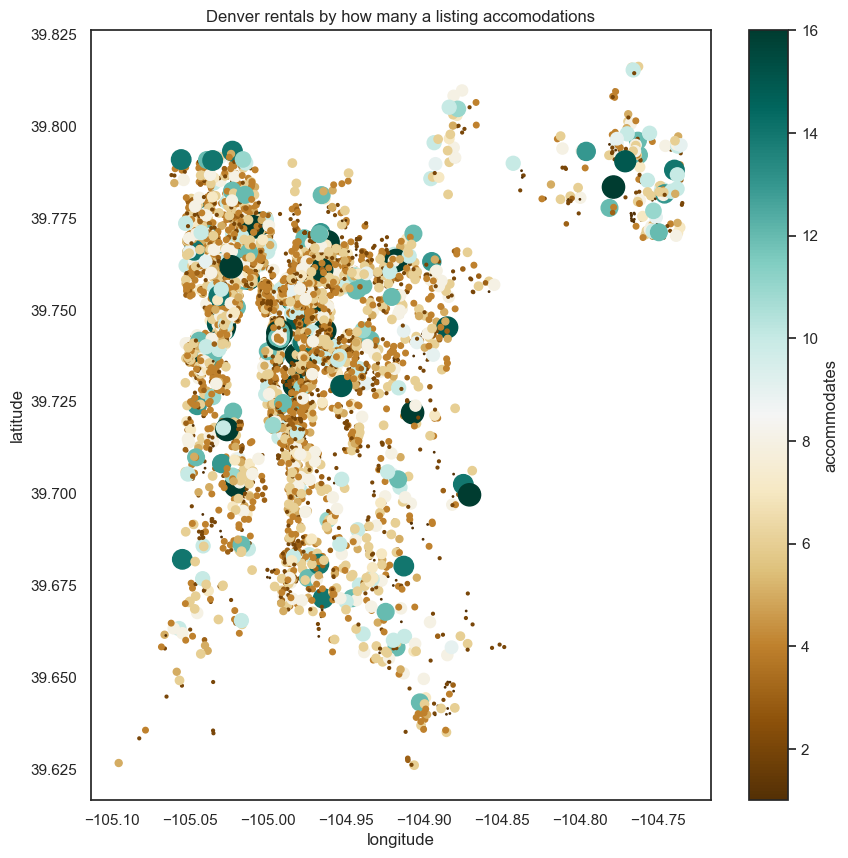

In [211]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='accommodates',
        cmap='BrBG',
        # edgecolors='black',
        figsize=(10,10),
        s= df['accommodates']**2
        
       )
plt.title('Denver rentals by how many a listing accomodations')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [72]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'shared_status', 'accommodates',
       'accomodation_group', 'bathrooms', 'bedrooms', 'beds_adjusted',
       'neighborhood', 'has_neighborhood_overview', 'has_reviews',
       'listing_url', 'host_in_CO', 'host_lives_in_neighborhood', 'host_id',
       'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'has_host_about',
       'years_hosting', 'years_of_reviews', 'license_listed', 'response_time',
       'host_lives_in_neighborhood.1', 'name', 'host_about', 'description',
       'neighborhood_overview', 'amenities', 'minimum_nights',
       'maximum_nights', 'min_stay_group', 'max_stay_group',
       'has_availability', 'instant_bookable', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating

# Sentiment

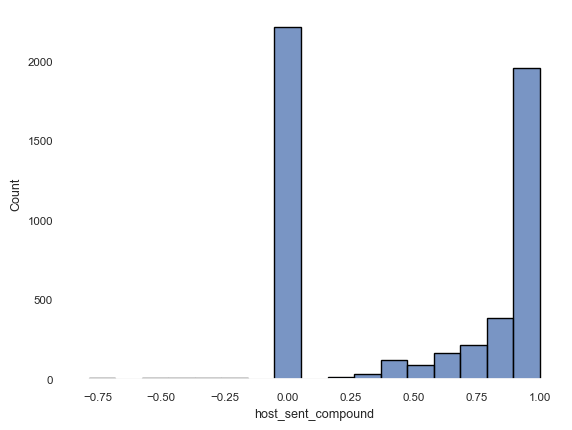

In [73]:
sns.histplot(df['host_sent_compound'], edgecolor='black')
sns.set(font_scale=1);

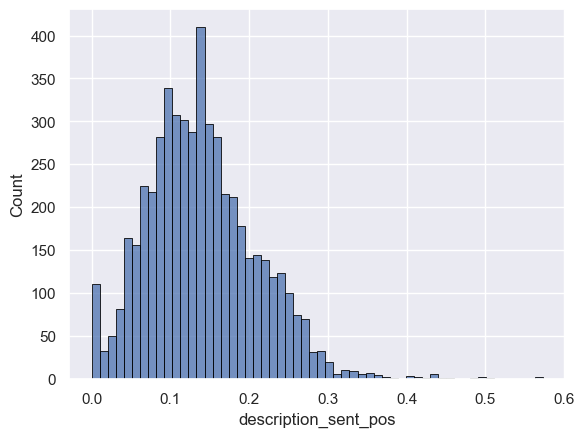

In [74]:
sns.histplot(df['description_sent_pos'], edgecolor='black');

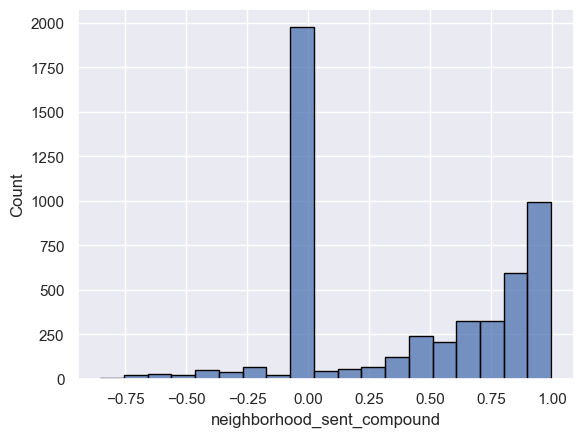

In [75]:
sns.histplot(df['neighborhood_sent_compound'], edgecolor='black');

In [68]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'shared_status', 'accommodates',
       'accomodation_group', 'bathrooms', 'bedrooms', 'beds_adjusted',
       'neighborhood', 'has_neighborhood_overview', 'has_reviews',
       'listing_url', 'host_in_CO', 'host_lives_in_neighborhood', 'host_id',
       'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'has_host_about',
       'years_hosting', 'years_of_reviews', 'license_listed', 'response_time',
       'host_lives_in_neighborhood.1', 'name', 'host_about', 'description',
       'neighborhood_overview', 'amenities', 'minimum_nights',
       'maximum_nights', 'min_stay_group', 'max_stay_group',
       'has_availability', 'instant_bookable', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating